#Bayesian Inference

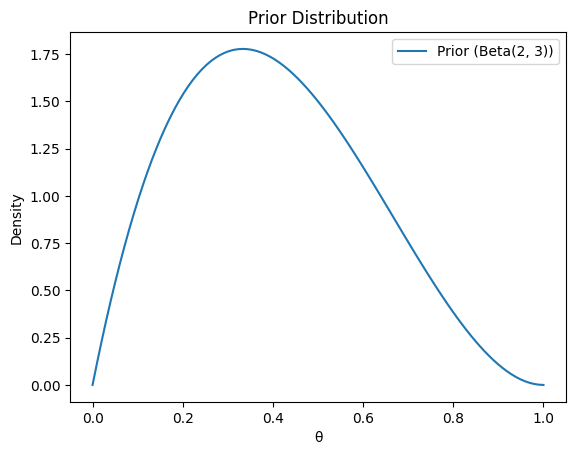

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import beta

# Simulated data (coin flips)
data = np.array([1, 0, 1, 1, 0, 1, 1, 1, 1, 0])

# Prior hyperparameters
alpha = 2
beta_val = 3  # Use a different name to avoid confusion with the beta distribution function

# Generate points for plotting the prior and posterior distributions
theta_values = np.linspace(0, 1, 100)

# Calculate prior and posterior densities
prior_pdf = beta.pdf(theta_values, alpha, beta_val)
# ^ Use scipy.stats.beta.pdf for the prior distribution

# Plotting the prior distribution
plt.plot(theta_values, prior_pdf, label='Prior (Beta({}, {}))'.format(alpha, beta_val))
plt.title('Prior Distribution')
plt.xlabel('θ')
plt.ylabel('Density')
plt.legend()
plt.show()


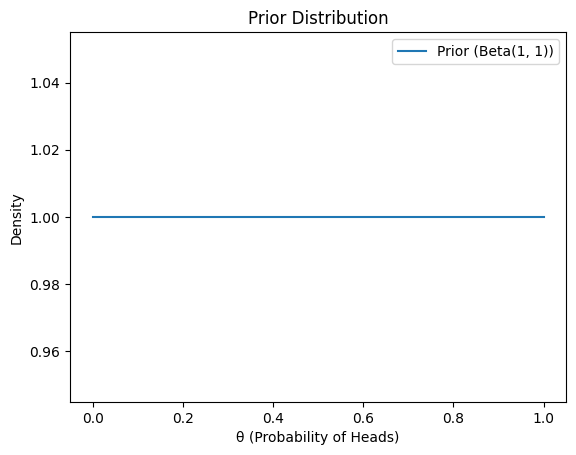

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import beta

# Parameters of the prior Beta distribution (uninformative prior)
alpha_prior = 1
beta_prior = 1

# Prior distribution (Beta distribution)
theta_values = np.linspace(0, 1, 100)
prior_pdf = beta.pdf(theta_values, alpha_prior, beta_prior)

# Plotting the prior distribution
plt.plot(theta_values, prior_pdf, label='Prior (Beta({}, {}))'.format(alpha_prior, beta_prior))
plt.title('Prior Distribution')
plt.xlabel('θ (Probability of Heads)')
plt.ylabel('Density')
plt.legend()
plt.show()

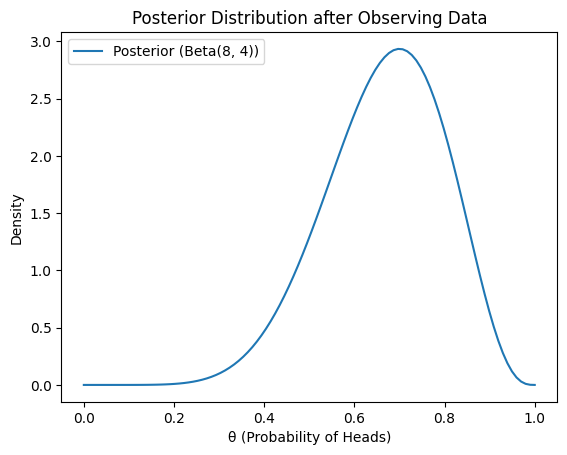

In [ ]:
# Simulate coin flips (1 = heads, 0 = tails)
coin_flips = [1, 0, 1, 1, 0, 1, 1, 1, 0, 1]

# Parameters of the posterior Beta distribution (after observing data)
alpha_posterior = alpha_prior  # Initial alpha from prior
beta_posterior = beta_prior    # Initial beta from prior

# Update posterior parameters based on observed data
for flip in coin_flips:
    alpha_posterior += flip   # Add 1 for heads (success)
    beta_posterior += 1 - flip  # Add 1 for tails (failure)

# Posterior distribution (Beta distribution)
posterior_pdf = beta.pdf(theta_values, alpha_posterior, beta_posterior)

# Plotting the posterior distribution
plt.plot(theta_values, posterior_pdf, label='Posterior (Beta({}, {}))'.format(alpha_posterior, beta_posterior))
plt.title('Posterior Distribution after Observing Data')
plt.xlabel('θ (Probability of Heads)')
plt.ylabel('Density')
plt.legend()
plt.show()


In [ ]:
# Calculate the mean (expected value) of the posterior Beta distribution
mean_theta_posterior = alpha_posterior / (alpha_posterior + beta_posterior)
print("Estimated Probability of Heads (θ) after Observing Data:", mean_theta_posterior)

Estimated Probability of Heads (θ) after Observing Data: 0.6666666666666666


#Bayesian Ridge Regression

In [ ]:
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.linear_model import BayesianRidge
from sklearn.metrics import mean_squared_error

# Load the California Housing dataset
data = fetch_california_housing()
X, y = data.data, data.target

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Fit Bayesian Ridge Regression
model = BayesianRidge()
model.fit(X_train, y_train)

# Evaluate the model
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
print("Bayesian Ridge Regression - Mean Squared Error:", mse)

Bayesian Ridge Regression - Mean Squared Error: 0.5555863660255022


#Ridge Regression

In [ ]:
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler

# Load the California Housing dataset
data = fetch_california_housing()
X, y = data.data, data.target

# Standardize features
scaler = StandardScaler()
X = scaler.fit_transform(X)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Fit Ridge Regression
model = Ridge(alpha=1.0)  # Specify regularization strength (alpha)
model.fit(X_train, y_train)

# Evaluate the model
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
print("Ridge Regression - Mean Squared Error:", mse)

Ridge Regression - Mean Squared Error: 0.5558512007367514
